In [1]:
import cv2
import sys
sys.path.append("../../utils")
from Gaussian_Smooth_Kernel import create_smooth_gaussian_filter
from Convolution import Convolution
import matplotlib.pyplot as plt

[[0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]
 [0.03751576 0.04431963 0.0468515  0.04431963 0.03751576]
 [0.03965895 0.0468515  0.04952803 0.0468515  0.03965895]
 [0.03751576 0.04431963 0.0468515  0.04431963 0.03751576]
 [0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]]


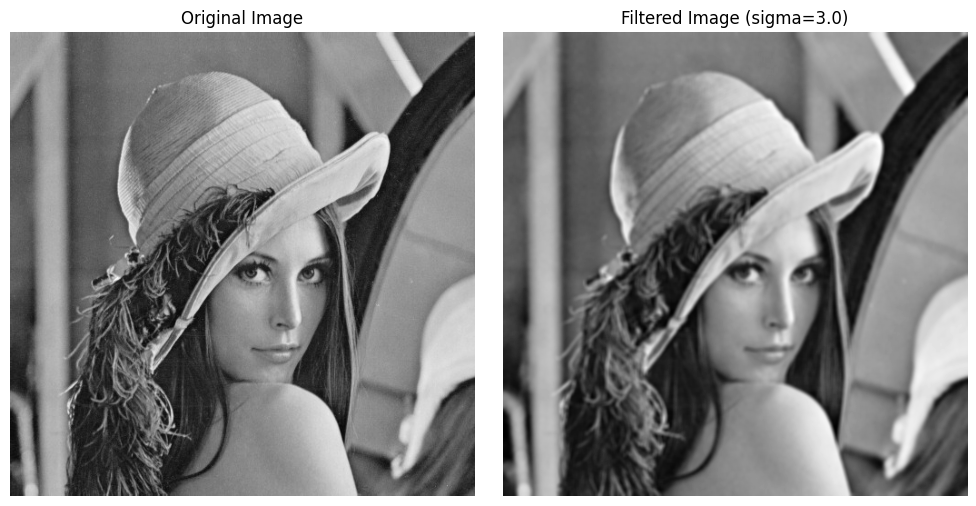

In [2]:
# Reading the image
image = cv2.imread("../../../data/Lena.jpg",cv2.IMREAD_GRAYSCALE)
# print(image)

sigma_value = input("Enter the sigma value for Gaussian filter: ")
if sigma_value:
    sigma_value = float(sigma_value)
else:
    print("Invalid input. Please enter a numeric value.")
    sigma_value = None

if sigma_value is not None:
  kernel = create_smooth_gaussian_filter(kernel_size=5,sigma_value= sigma_value)
  kernel_height,kernel_width = kernel.shape
    
  # finding the center of the kernel
  center_x = kernel_height // 2
  center_y  = kernel_width // 2
  convolved_image = Convolution(image=image,kernel=kernel,anchor_row=center_x,anchor_col=center_y)
  
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
  ax1.imshow(image, cmap='gray')
  ax1.set_title('Original Image')
  ax1.axis('off')  # Hide axes
  ax2.imshow(convolved_image, cmap='gray')
  ax2.set_title(f'Filtered Image (sigma={sigma_value})')
  ax2.axis('off')  # Hide axes
  plt.tight_layout()  # Adjust spacing
  plt.show()